<a href="https://colab.research.google.com/github/vasanthcroos03/Tutorial-numpy/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{Gold price data]-----[Data preprocessing] why we need to do this we need to make the raw data to a machine learning algorthim------[Data Analysis] In this part we need to know which are important and unimportant parts that we need to neglect---[Train Test split] here we will split our original data into training data and Testing data, Train data to train the model and Test data to test the model how well our model is working in current.[Random Forest Regressor]------ In here we are using Random Forest Regressor, once we train the data to the Random Forest Regressor we can make new predictions.[Evaluation]------ We will evaluate our test data

Importing the libraries

In [1]:
import numpy as np
# numpy is used to make some numpy arrays
import pandas as pd
#pandas is used to make some data frames so Data frames are nothing but structured frame
#our dataset in a form of csv file so its not easy to analyze a csv file that also pandas library we use.

import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib, seaborn are use to make plots

from sklearn.model_selection import train_test_split
#we are going to split the original data into training data and splitting data
#for that we are using this

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#evaluate the error score and accuracy score




# Data collection and processing

In [2]:
#first we need to load our data set which in csv data to pandas data frame.
gold_data = pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')
# now we are successfully upload the csv file to pandas data frame.

In [3]:
# first we are going to print the 5 rows in the data frame
gold_data.head()
#here head function print the first 5 datas

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#printing the last 5 rows of the dataframe
gold_data.tail()
#here tail function prints tha last 5 datas

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and colums
gold_data.shape

(2290, 6)

In [6]:
# getting  some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# Getting some statistical measures of the data
gold_data.describe()
# This describe function gives us some statistical matters like mean, standard deviation,

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
There are mainly two types of correlations

1.Positive correlation
2. Negative correlation


If we take two variables etc GLD and Uso if GLD price propotional to USo price its positive correlation and if one increase other decrease its negative correlation.

In [8]:
correlation = gold_data.corr()

<ipython-input-8-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

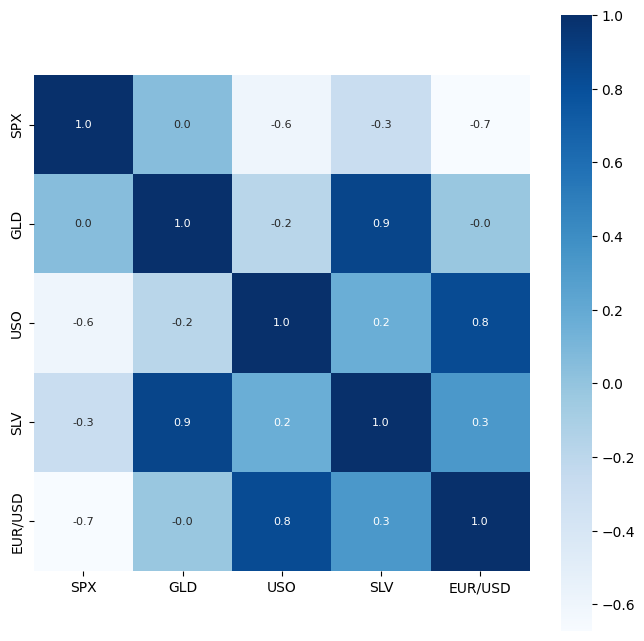

In [9]:
# constructing a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

Above plot shows that GLD and SLV has positive correlated 0.9 that means if silver price increses gold price also increse if gold price increases silver price also increase.
same as which has negative values it means negative correlation if one thing increase other one decrease.

In [10]:
# Correlation values of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-68275f393b8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

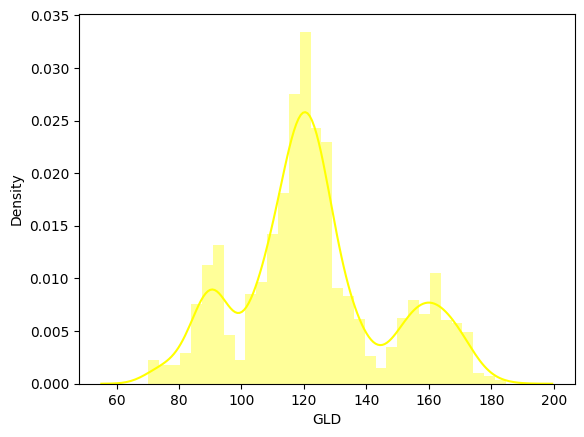

In [11]:
# Check the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='yellow')

**Splitting the Features and Target**

1.   List item
2.   List item



In [12]:
X = gold_data.drop(['Date','GLD',], axis=1) #here we remove date column and GLD column
Y = gold_data['GLD']   # Here we have GLD column

In [13]:
print(X) # why we remove those columns we dont need those in our prediction

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting into Traning data and Test **data**

In [15]:
# 80% of the value go into train data and 20% of the value go into testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2) # we have imported this in sklearn model
# X_test contain corresponding all the values of Y_test gold and Y_test contain corresponding
# all the X_test gold values


### Model Training : Random Forest Regressor

What is Random forest algorhitm is - Single decision tree and random forest tree are important in this project we use random Forest

In [16]:
# Fromsklearn we have imported Radom Forest regressor
regressor = RandomForestRegressor(n_estimators=100)   #n_estimators=100 is a default number

In [17]:
#Training the model
regressor.fit(X_train,Y_train)
#X_train


RandomForestRegressor()

### Model Evaluation

In [18]:
#Prediction on test data
test_data_prediction=regressor.predict(X_test)
#

In [19]:
print(test_data_prediction)
# These are the values predicted by our model
#now we  are compare our output and test data

[168.45919911  81.83109997 116.09020033 127.7079005  120.57600153
 154.67699809 150.41109843 126.10480044 117.51839875 125.94530089
 116.52080116 171.5615004  141.28959815 167.71659806 115.15850009
 117.50500039 138.60210327 169.91450064 159.78020361 158.03569994
 155.13230003 125.32800047 176.52349877 156.73150303 125.29170042
  93.79979939  77.81760037 120.44850014 119.02479897 167.47450026
  88.0628008  125.18169984  91.1574008  117.60820046 121.1544992
 136.21390031 115.34150144 115.04400088 150.04139984 107.20020094
 104.34350244  87.14489787 126.48740047 117.98940013 152.73829943
 119.767      108.45499984 108.09839793  93.17260062 127.10339792
  75.37370034 113.56369913 120.9535002  111.37459874 118.81629885
 120.57659943 159.73160027 167.14170211 146.83349683  85.90219824
  94.40100014  86.79289892  90.69090039 119.06210084 126.47780032
 127.5824997  169.8866995  122.36979917 117.39689894  98.43510017
 168.10200111 142.93649938 132.27690236 121.32720229 121.25699939
 119.845700

In [20]:
# R squared error-which
#we already
error_score = metrics.r2_score(Y_test, test_data_prediction)  # Here  we are  going with real  value with predicted  value  real   value is
print("R  squared  error :  ",error_score)

R  squared  error :   0.9896255712932213


### Compare the actual values  annd predicted  values in  a plot

In [21]:
Y_test =  list(Y_test)  #  it is conveted to a list

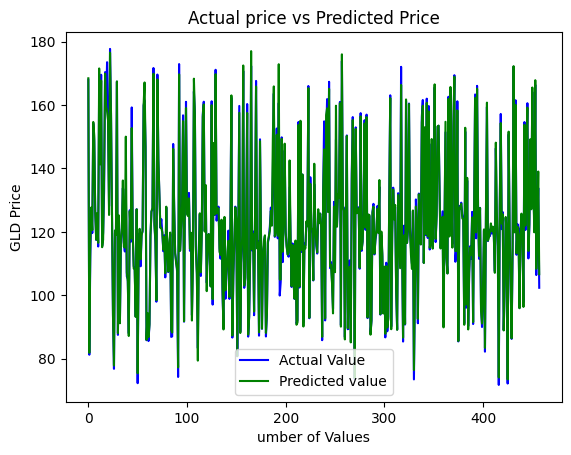

In [26]:
#  now plot  real or actual price in blue color
# and predicted price in green color
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color  = 'green', label = 'Predicted value' )
plt.title('Actual price vs Predicted Price')
plt.xlabel('umber of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# In above you can see our actual price and predicted price are pretty much same
# With little deviation because of error score